In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs import project_config
from configs.RecursiveVPSDE.LSTM_4DLorenz.recursive_LSTM_PostMeanScore_4DLorenz_T256_H05_tl_110data_StbleTgt import get_config
#from configs.RecursiveVPSDE.LSTM_4DLorenz.recursive_LSTM_PostMeanScore_4DLorenz_10FC_T256_H05_tl_110data_StbleTgt import get_config
#from configs.RecursiveVPSDE.LSTM_4DLorenz.recursive_LSTM_PostMeanScore_4DLorenz_125FC_T256_H05_tl_110data_StbleTgt import get_config

In [2]:
num_paths = 10952

In [3]:
def get_drift_files(config):
    ts_type = f"{config.ndims}DLnz"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_dir = project_config.ROOT_DIR + f"experiments/results/"
    global_files = []
    true_files = []
    local_files = []
    for file in os.listdir(root_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file and ((f"{config.forcing_const}FConst").replace(".","") in file):
            if "true" in file:
                true_files.append(root_dir+file)
            elif "local" in file:
                local_files.append(root_dir+file)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[3][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws

In [4]:
config = get_config()
true_files, local_files, bws = get_drift_files(config=config)
local_files

['/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_00001bw_10952NPaths_00t0_3906e-03dT_075FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_0000126bw_10952NPaths_00t0_3906e-03dT_075FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_0000159bw_10952NPaths_00t0_3906e-03dT_075FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_0000201bw_10952NPaths_00t0_3906e-03dT_075FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_0000254bw_10952NPaths_00t0_3906e-03dT_075FConst_local_states.npy',
 '/Users/marcos/GitHubRepos/FractionalBrownianMotion/experiments/results/IIDNadaraya_f4DLnz_DriftTrack_0000321bw_10952NPaths_00t0_3906e-03dT_075FConst_l

0.0035447620371359483 0.0 inf 0
0.0035447620371359483 0.0 inf 1


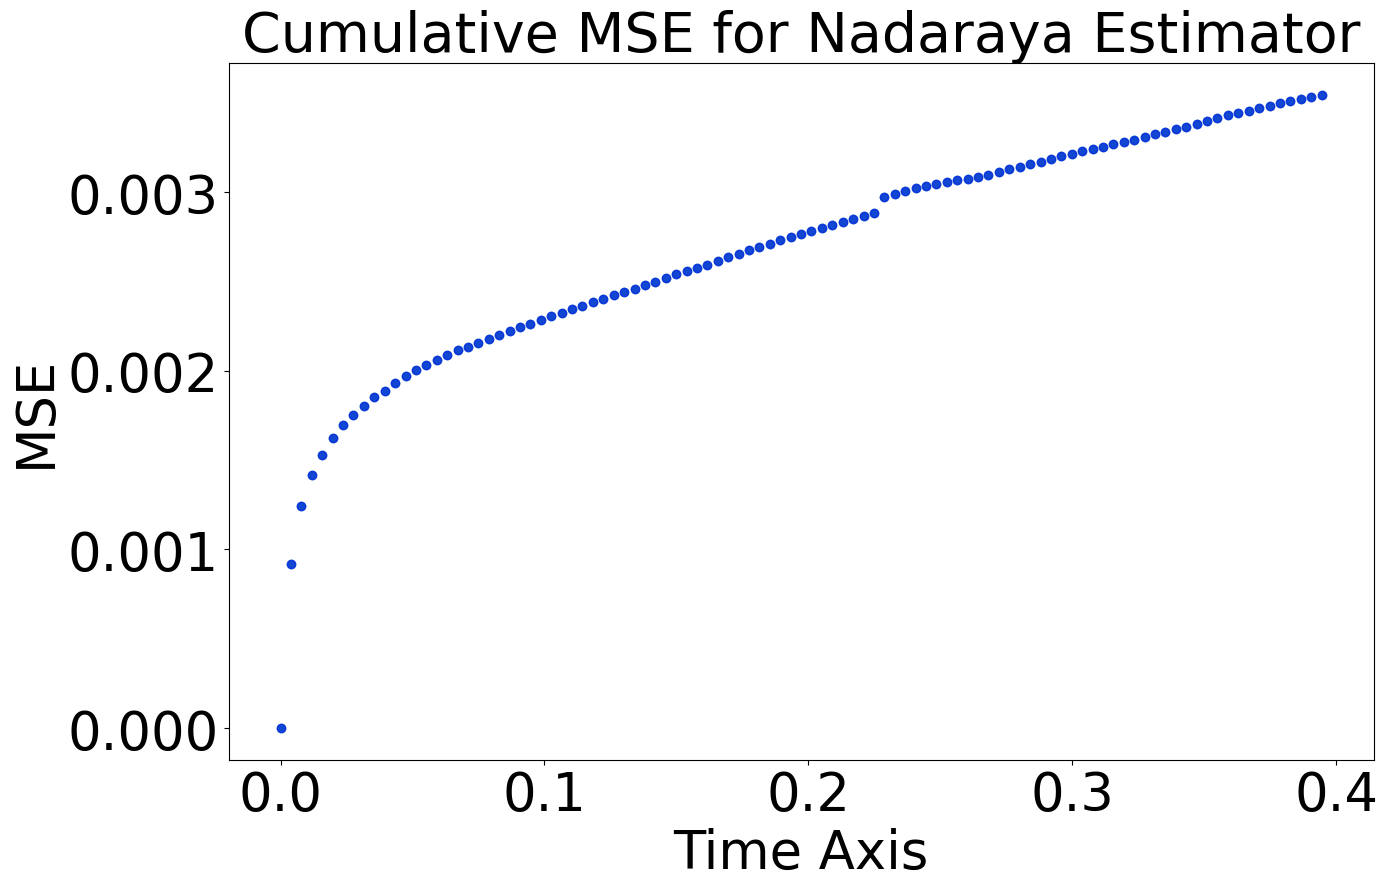

Final time cumulative MSE local-time error 0.0035447620371359483 with IQR ((0.0035447620371359483, 0.0035447620371359483))at bw 1.26e-05 for 0.75FConst

0.0035457547607742 0.0 0.0035447620371359483 2
0.00391313233208143 0.0 0.0035447620371359483 3
0.004070522308730477 0.0 0.0035447620371359483 4
0.00534605312793721 0.0 0.0035447620371359483 5
0.006259865245316175 0.0 0.0035447620371359483 6
0.007441353949705962 0.0 0.0035447620371359483 7
0.009805485231726049 0.0 0.0035447620371359483 8
0.011522247094748724 0.0 0.0035447620371359483 9
0.01228275057721792 0.0 0.0035447620371359483 10
0.01393234062485155 0.0 0.0035447620371359483 11
0.016177436827222332 0.0 0.0035447620371359483 12
0.016852868244356452 0.0 0.0035447620371359483 13
0.019767265839086397 0.0 0.0035447620371359483 14
0.023035694727149277 0.0 0.0035447620371359483 15
0.026717122795526738 0.0 0.0035447620371359483 16
0.03194171527285204 0.0 0.0035447620371359483 17
0.03581091948614345 0.0 0.0035447620371359483 18
0.04234257152

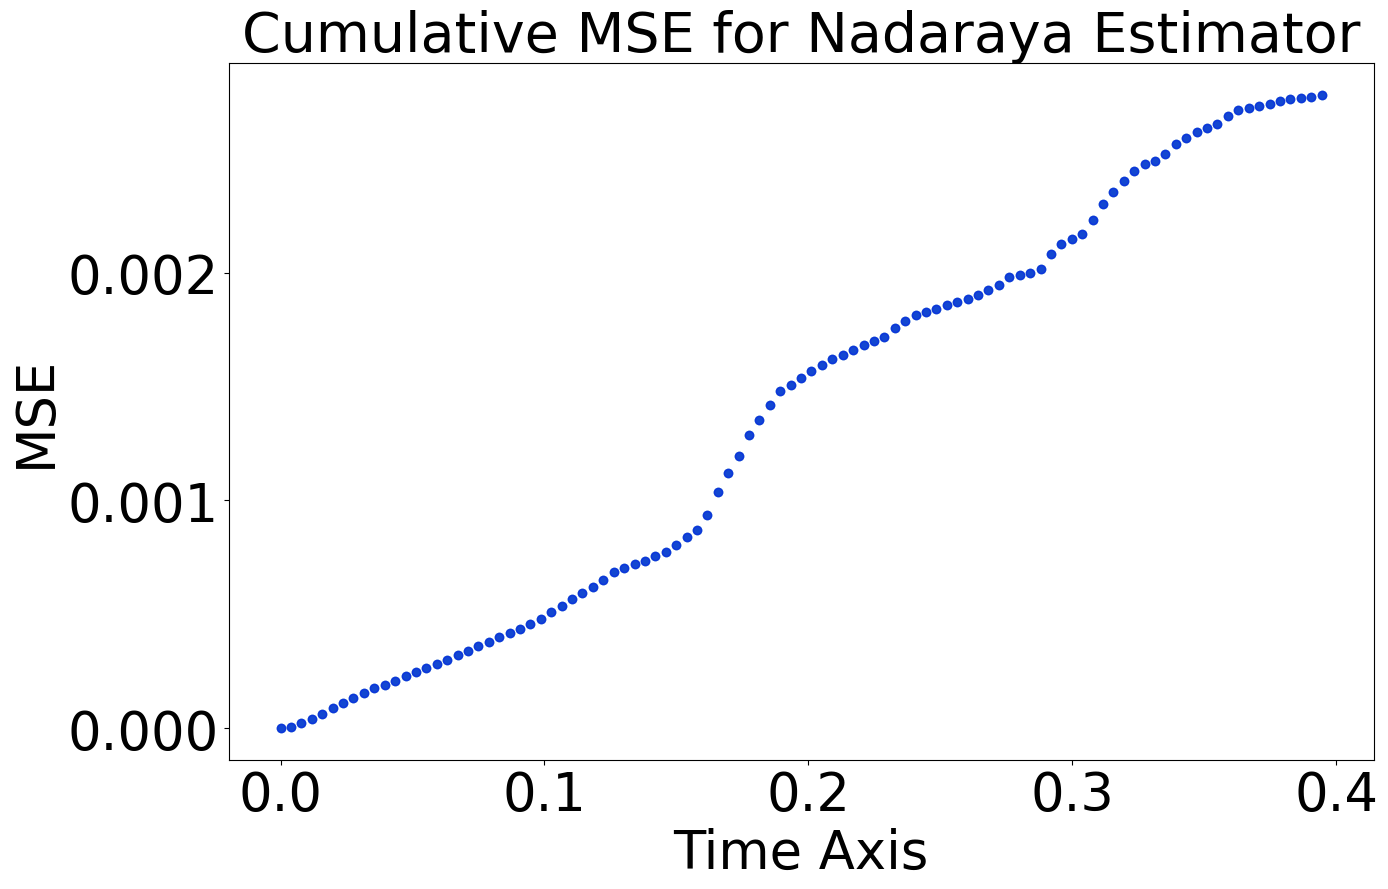

Final time cumulative MSE local-time error 0.0027825798777263034 with IQR ((0.0027825798777263047, 0.0027825798777263047))at bw 0.0137957 for 0.75FConst

0.0016428504142721036 0.0 0.0027825798777263034 32


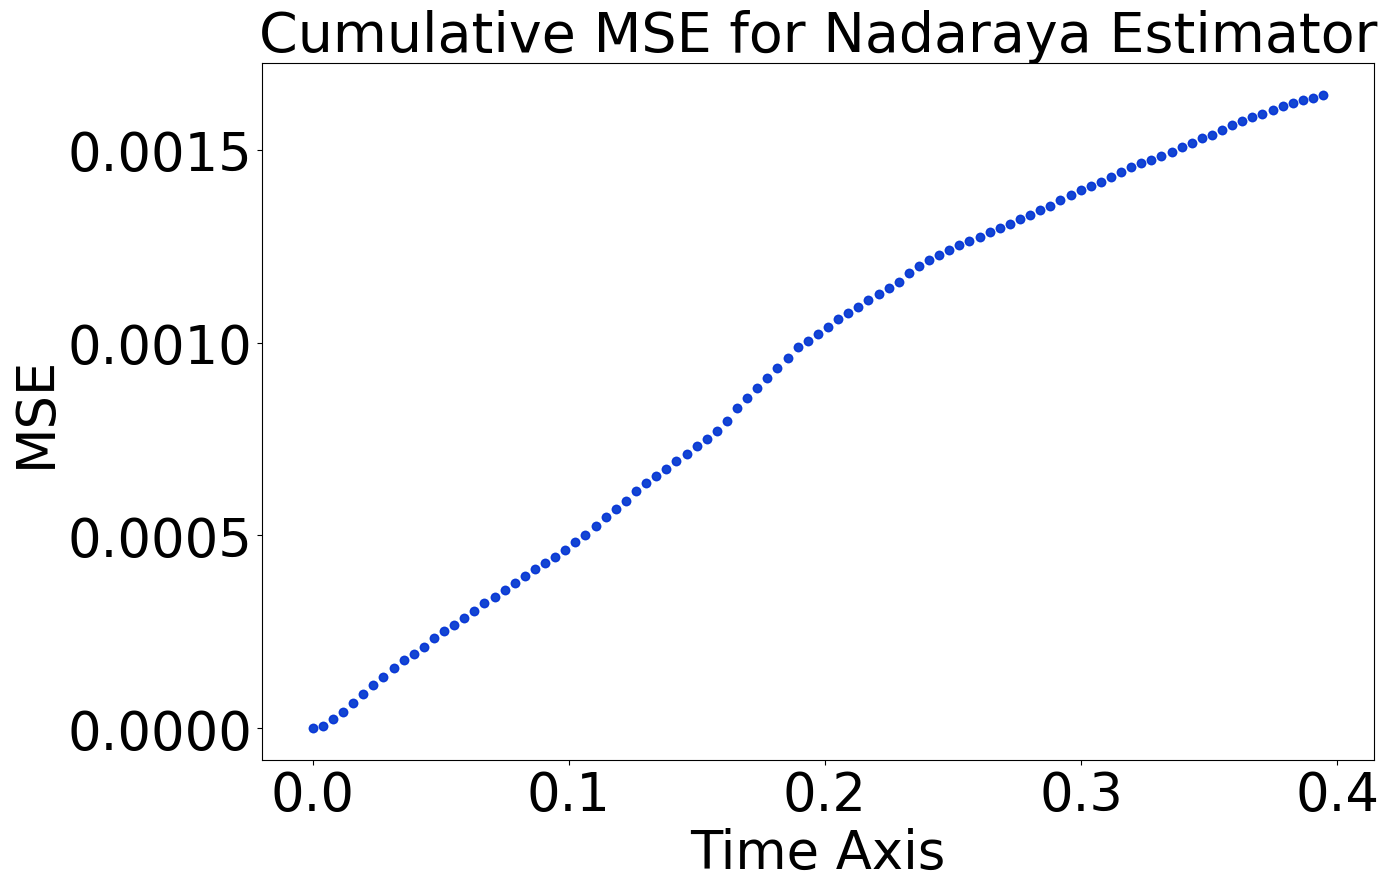

Final time cumulative MSE local-time error 0.0016428504142721036 with IQR ((0.0016428504142721033, 0.0016428504142721033))at bw 0.0174191 for 0.75FConst

0.0014880684083453328 0.0 0.0016428504142721036 33


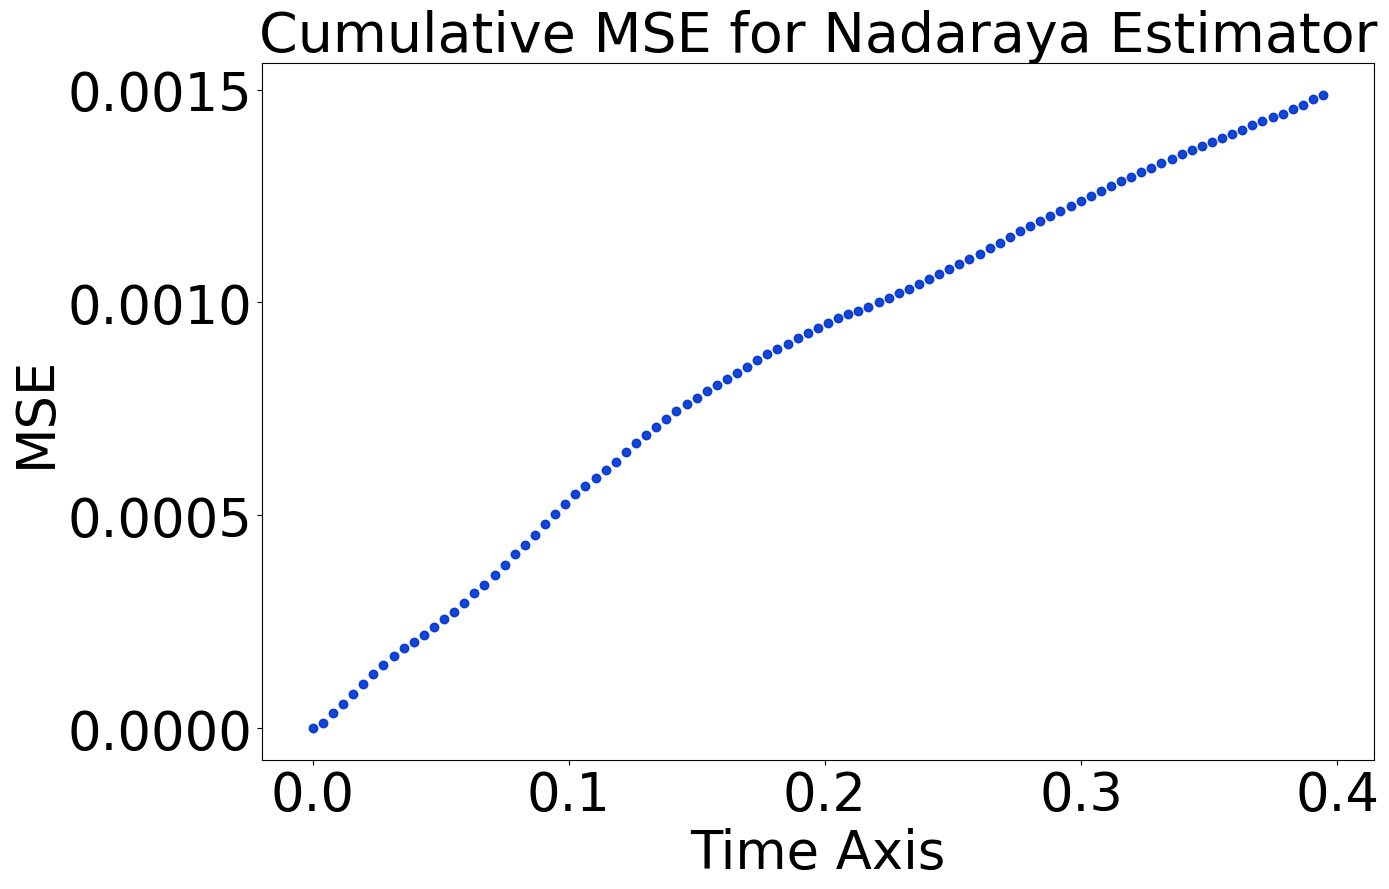

Final time cumulative MSE local-time error 0.0014880684083453328 with IQR ((0.0014880684083453334, 0.0014880684083453334))at bw 0.0219942 for 0.75FConst

0.0015118736754030535 0.0 0.0014880684083453328 34
0.0015472188971583027 0.0 0.0014880684083453328 35
0.0015923392928494343 0.0 0.0014880684083453328 36
0.001643105412131806 0.0 0.0014880684083453328 37
0.0016949075951925292 0.0 0.0014880684083453328 38
0.0017454707151468186 0.0 0.0014880684083453328 39


In [5]:
curr_rmse = np.inf
toSave = True
i = 0
for file in zip(*[true_files, local_files, bws]):
    bw = file[-1]
    all_true_states = np.load(file[0])/np.sqrt(config.deltaT)
    all_local_states = np.load(file[1])/np.sqrt(config.deltaT)
    if (len(all_true_states.shape) == len(all_local_states.shape) == 4):
        all_local_errors = np.cumsum(np.mean(np.power(all_true_states- all_local_states,2), axis=(1,3)), axis=-1)/np.arange(1, all_local_states.shape[2]+1)
        total_local_errors = np.mean((all_local_errors), axis=0)
        total_local_errors_minq = np.quantile((all_local_errors), axis=0,q=0.025)
        total_local_errors_maxq = np.quantile((all_local_errors), axis=0,q=0.975)
        print(total_local_errors[-1], total_local_errors_maxq[-1]-total_local_errors_minq[-1], curr_rmse, i)
        i += 1
        if i == 1: continue
        if total_local_errors[-1]  < curr_rmse:
            miny = total_local_errors-total_local_errors_minq
            miny[miny < 0.] = 0.
            maxy = total_local_errors_maxq-total_local_errors
            maxy[maxy < 0.] = 0.
            time_steps = np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0])
            curr_rmse = total_local_errors[-1]
            fig, ax = plt.subplots(figsize=(14,9))
            ax.scatter(np.linspace(config.t0,config.deltaT*total_local_errors.shape[0],total_local_errors.shape[0]), total_local_errors)
            plt.errorbar(time_steps,total_local_errors,yerr=[miny, maxy],xerr=None, fmt='o', color="blue", alpha=0.4)
            ax.set_title(f"Cumulative MSE for Nadaraya Estimator",fontsize=40)
            ax.set_ylabel("MSE", fontsize=38)
            ax.set_xlabel("Time Axis", fontsize=38)
            ax.tick_params(labelsize=38)
            plt.tight_layout()
            if toSave:
                plt.savefig((f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModelPresentationImages/IIDNadaraya_4DLnz_DriftTrack_{round(bw, 6)}bw_{config.forcing_const}FConst_{round(total_local_errors_minq[-1], 4)}_MinIQR_{round(total_local_errors_maxq[-1], 4)}_MaxIQR").replace(".", "")+".png")
            plt.show()
            plt.close()
            print(f"Final time cumulative MSE local-time error {total_local_errors[-1]} with IQR ({total_local_errors_minq[-1], total_local_errors_maxq[-1]})at bw {bw} for {config.forcing_const}FConst\n")